<a href="https://colab.research.google.com/github/Uziana7/Pubmed_Medline_Parsing_BioPython/blob/main/ParsePubMedMedline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parsing PubMed Medline Data using BioPython**



# ***Step 1: Go to PubMed***
Search your desired query. I am gonna search for "**Food and Disease**"

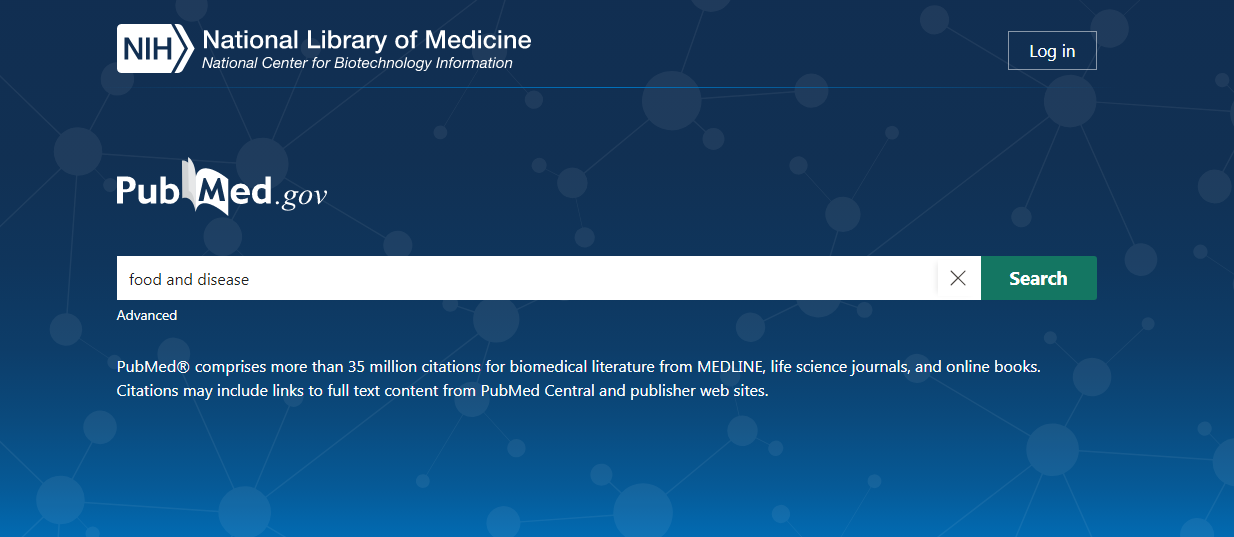

Download the PubMed file containing all results. You can download required number of papers by giving a range. But, the maximum limit is 10,000

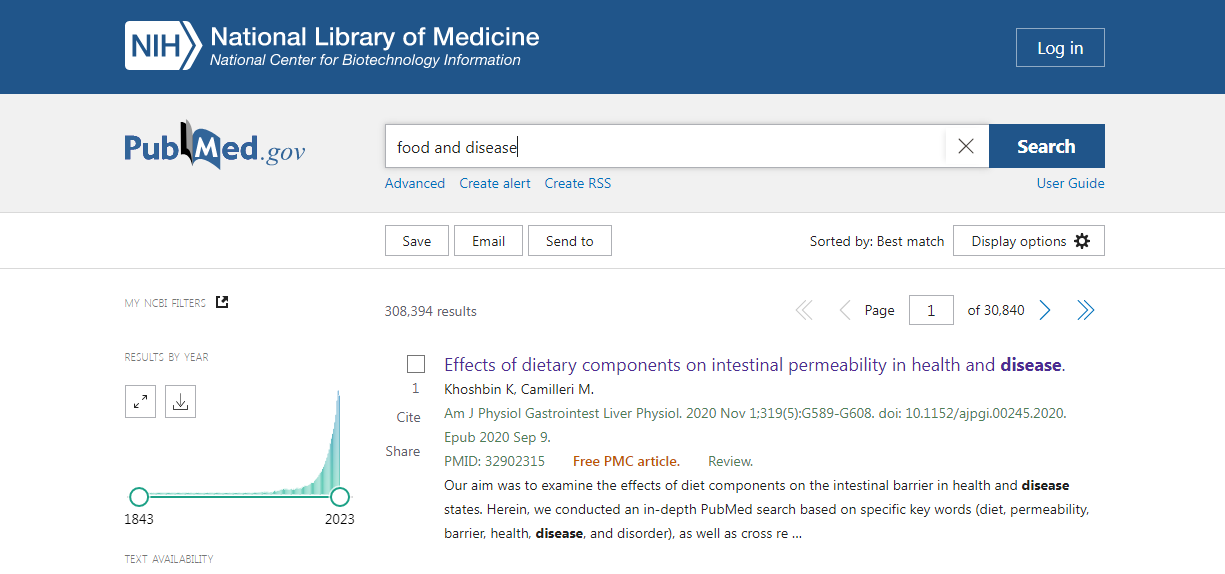

Click on "**Save**". Choose "**All Results**" with format "**PubMed**"

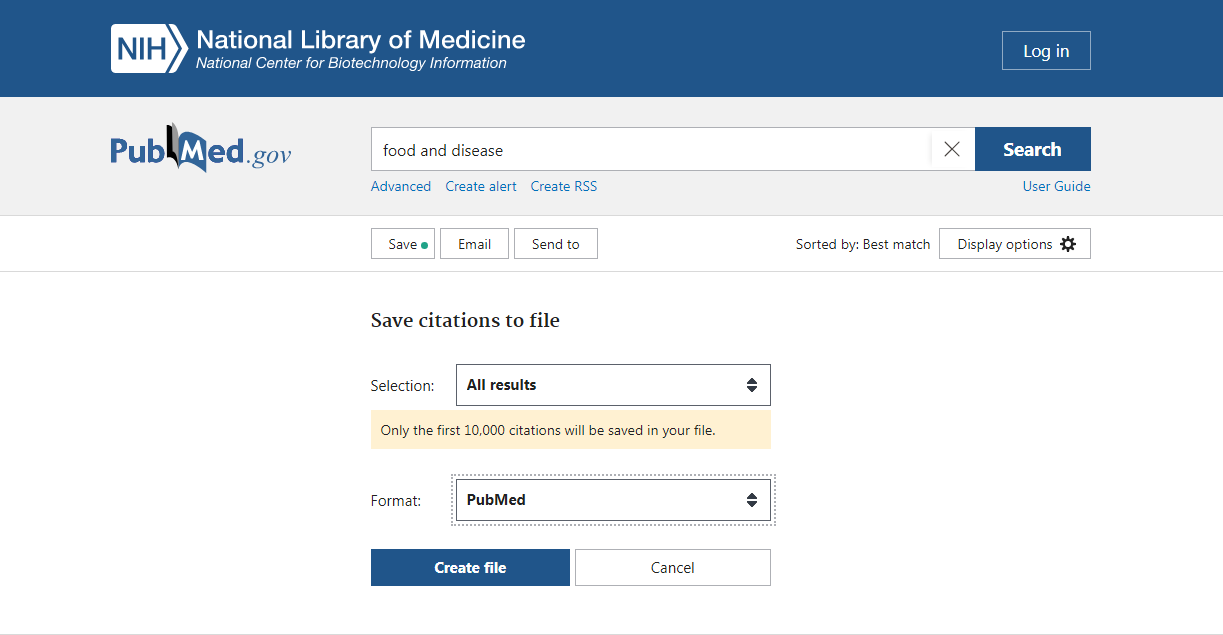

Click on "**Create File**". A file named "**pubmed-foodanddis-set**" will be downloaded in a few minutes.

Upload that file in the Notebook or whatever software you are using.

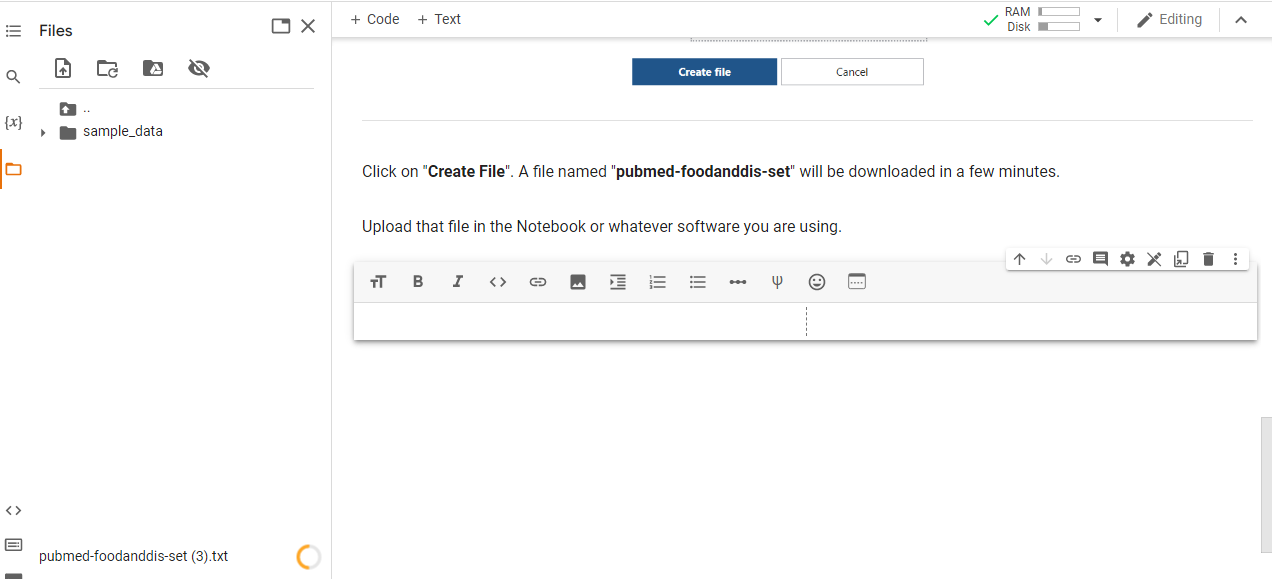

The file will be uploaded in a few minutes. 

# **Step 2: Install BioPython**

In [ ]:
!pip install Biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.9 MB/s eta 0:00:00


# **Now from BioPython import Medline**

In [ ]:
from Bio import Medline 

In [ ]:
import pandas as pd
import tqdm as tqdm

In [ ]:
alldata = []

Now, if you open the downloaded text file from PubMed, you will see a number of keys with corresponding values. If you find any difficulty with these keys, here is the link. All data are stored under the mnemonic appearing in the Medline file. These mnemonics have the following interpretations: 
https://biopython.org/docs/1.75/api/Bio.Medline.html

Now, it is easy to extract all possible attributes as literature information from PubMed file.

I selected, 17 attributes including PMID, Title, Publication date, Authors, Affiliations, Journal, etc.

In [7]:
with open('pubmed-foodanddis-set.txt', encoding='utf-8') as f:
  records = Medline.parse(f)
  for record in records:
    try:
      Pubmed_ID = record['PMID']
    except:
      Pubmed_ID = ''
    try:
      PMC_ID = record['PMC']
    except:
      PMC_ID = ''
    try:
      Title = record['TI']
    except: 
      Title = ''
    try:
      Authors = record['AU']
    except:
      Authors = ''
    try:
      Affiliations = record['AD']
    except:
      Affiliations = ''
    try:
      Journal = record['JT']
    except:
      Journal = ''
    try:
      NLM_Unique_ID = record['JID']
    except:
      NLM_Unique_ID = ''
    try:
      volume = record['VI']
    except:
      volume = ''
    try:
      Publication_Date = record['DP']
    except:
      Publication_Date = ''
    try:
      issue = record['IP']
    except:
      issue = ''
    try:
      DOI = record['AID']
    except:
      DOI = ''
    try:
      Publication_type = record['PT']
    except:
      Publication_type = ''
    try:
      copyrights = record['CI']
    except:
      copyrights = ''
    try:
      Mesh = record['MH']
    except:
      Mesh = ''
    try:
      Pages = record['PG']
    except:
      Pages = ''
    try:
      place = record['PL']
    except:
      place = ''
    try:
      abstract = record['AB']
    except: 
      abstract = ''
    dict = {
        'PMID' : Pubmed_ID,
        'PMC' : PMC_ID,
        'Title' : Title,
        'Author' : Authors,
        'Affiliation': Affiliations,
        'JournalName' : Journal,
        'JournalID' : NLM_Unique_ID,
        'Volume' : volume,
        'PublicationDate' : Publication_Date,
        'Issue' : issue,
        'Doi' : DOI,
        'PublicationType' : Publication_type,
        'Copyrights' : copyrights,
        'MeshTerms' : Mesh,
        'Pagination' : Pages,
        'PlaceOfPublication' : place,
        'Abstract' : abstract
    }
    alldata.append(dict)
print(alldata)
data = pd.DataFrame(alldata)
data.to_csv('Pubmed-data-file.csv', header = True, index = False)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



After you run this code, a csv file will be generated as output and you can download that. 

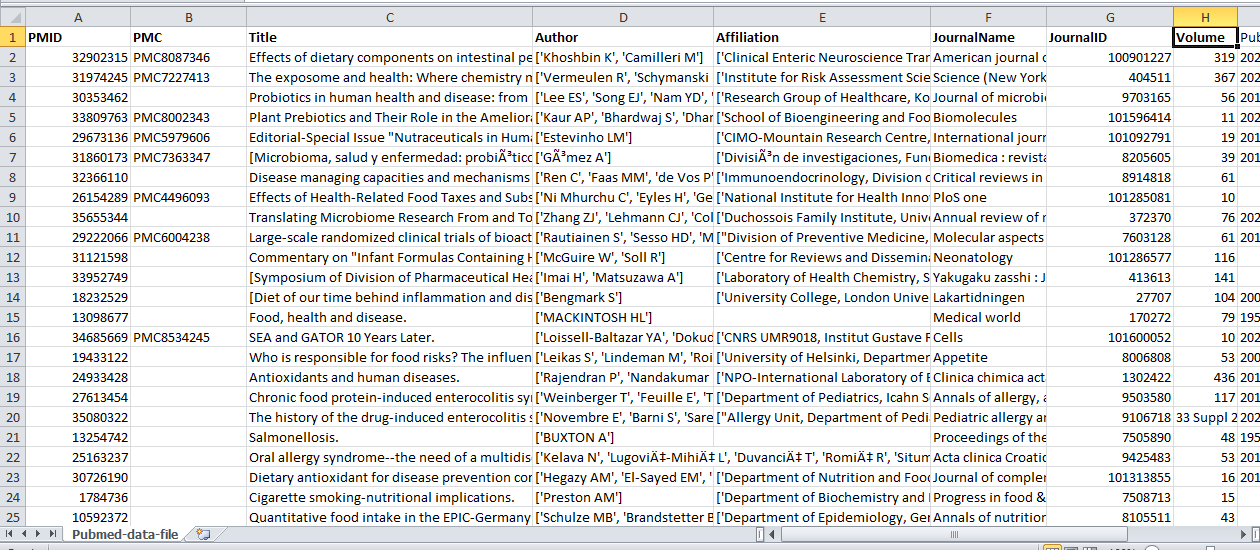

You can extract as many attributes as possible.